<a href="https://colab.research.google.com/github/SeemantAdhikari/Placement-prediction/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import os
os.listdir()


['.config', 'sample_data']

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving placement_data_with_names.csv to placement_data_with_names.csv


In [ ]:
df = pd.read_csv('placement_data_with_names.csv')

In [ ]:
print (df.shape)
df.head()

(100, 4)


,cgpa,iq,placement,student_name
0,6.8,123.0,1,Aarav Sharma
1,5.9,106.0,0,Diya Chatterjee
2,5.3,121.0,0,Aarav Khan
3,7.4,132.0,1,Aditya Sharma
4,5.8,142.0,0,Anaya Roy


<Axes: xlabel='cgpa', ylabel='iq'>

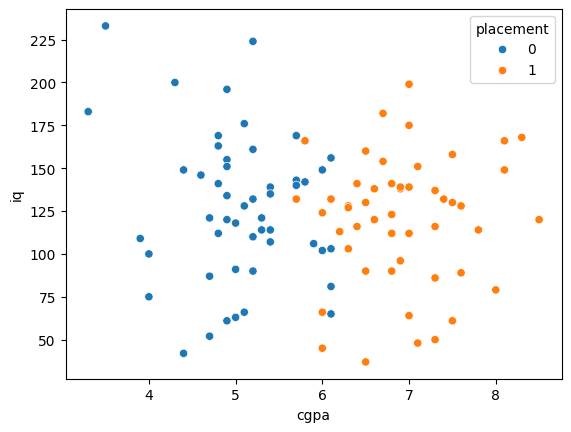

In [ ]:
sns.scatterplot(x =df['cgpa'], y=df['iq'], hue=df['placement'])


In [ ]:
X = df.iloc[:, 0:2]   # First two columns: features (e.g., cgpa and iq)
y = df.iloc[:, -1]    # Last column: label (e.g., placement)


In [ ]:
from sklearn.linear_model import Perceptron
p = Perceptron()


In [ ]:
p.fit(X, y)


Perceptron()

In [ ]:
p.coef_


array([[11., 47.]])

In [ ]:
p.intercept_


array([-72.])

In [ ]:
!pip install mlxtend


In [ ]:
from mlxtend.plotting import plot_decision_regions


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

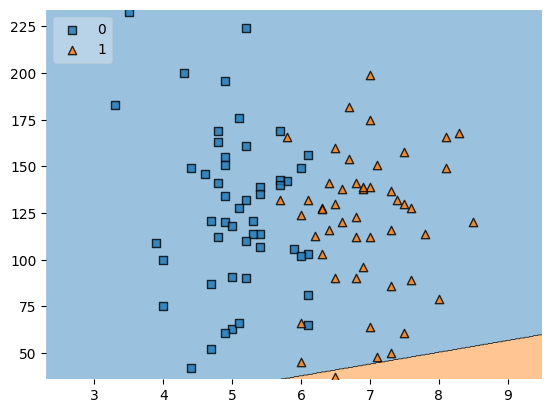

In [ ]:
plot_decision_regions(X.values, y.values, clf=p, legend=2)


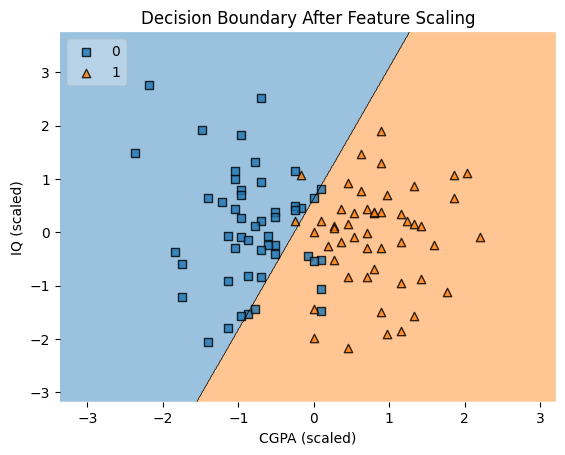

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Features and labels
X = df[['cgpa', 'iq']]
y = df['placement']

# 1. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Train the Perceptron model
p = Perceptron()
p.fit(X_scaled, y.to_numpy().astype(int))  # ensure y is a NumPy int array

# 3. Plot decision boundary
plot_decision_regions(X_scaled, y.to_numpy().astype(int), clf=p, legend=2)

# 4. Beautify the plot
plt.title("Decision Boundary After Feature Scaling")
plt.xlabel("CGPA (scaled)")
plt.ylabel("IQ (scaled)")
plt.show()


In [ ]:
# New student's CGPA and IQ
new_data = [[7.2, 130]]  # [[cgpa, iq]]

# Scale the input using the same scaler used during training
new_data_scaled = scaler.transform(new_data)

# Predict placement
prediction = p.predict(new_data_scaled)

# Output result
if prediction[0] == 1:
    print("✅ The student is likely to be placed.")
else:
    print("❌ The student is likely not to be placed.")


✅ The student is likely to be placed.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
